In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
Y=data['churn']
X=data.drop(columns=['churn','customer_id'])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_X,Y,train_size=0.80,stratify =Y, random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

### Model Building, Bagging Logistics Regression 

In [6]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [7]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator = LR(),
                n_estimators = 150,
                n_jobs = -1,
                random_state = 42)
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [9]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [11]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
predicted_values = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [13]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.72      0.46      0.56       855

    accuracy                           0.86      4414
   macro avg       0.80      0.71      0.74      4414
weighted avg       0.85      0.86      0.85      4414



###  cal_score(), effect()

In [14]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [15]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (5,5), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

### Hyperparameter Tuning

In [16]:
classifier =RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
estimators = [i for i in range(1,600,10)]
train =[]
test=[]

for i in estimators:
    model=RFC(class_weight = 'balanced_subsample', # the weights are assigned based on the bootstrapped sample that each tree recieves
             n_estimators = i,
             n_jobs = -1,
             max_depth = 7,
             random_state = 101)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

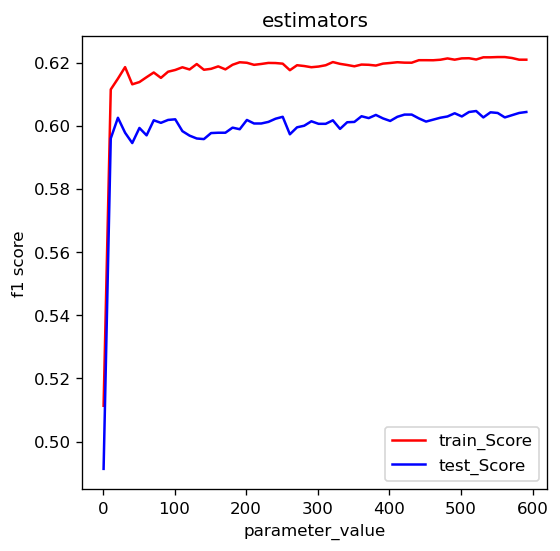

In [18]:
effect( train, test, range(1,600,10) , 'estimators')

### Max samples

In [19]:
max_samples=[i/1000 for i in range(1,1000)]
train=[]
test=[]
for i in max_samples:
    model = RFC(class_weight = 'balanced_subsample', # the weights are assigned based on the bootstrapped sample that each tree recieves
             n_estimators = 50,
             n_jobs = -1,
             max_depth = 7,
             random_state = 101,
             max_samples = i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

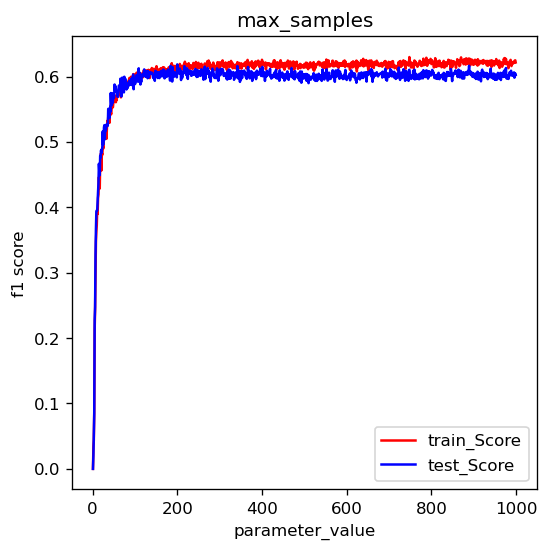

In [20]:
effect( train, test, range(1,1000) , 'max_samples')

It is not necessary that 
amount of bootstrapped data = amount of origial data

###  max features (default (root(N))

In [21]:
max_features= range(1,X.shape[1])
train=[]
test=[]
for i in max_samples:
    model = RFC(class_weight = 'balanced_subsample', # the weights are assigned based on the bootstrapped sample that each tree recieves
             n_estimators = 50,
             n_jobs = -1,
             max_depth = 7,
             random_state = 101,
             max_features = i)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

ValueError: x and y must have same first dimension, but have shapes (18,) and (999,)

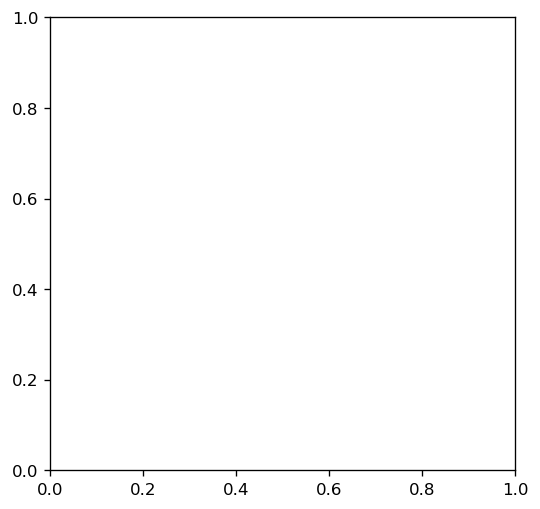

In [22]:
effect( train, test, range(1,X.shape[1]) , 'max_features')